In [ ]:
#SALES PREDICTION USING SOCIAL MEDIA ADS

In [ ]:
#imPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score


In [ ]:
data=pd.read_csv("/content/Social_Network_Ads.csv")

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
data.isnull().sum()
#There is no missing values in the dataset.

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
data.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [ ]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
data['Gender'].replace({'Male':0, 'Female':1}, inplace = True)

In [ ]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [ ]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

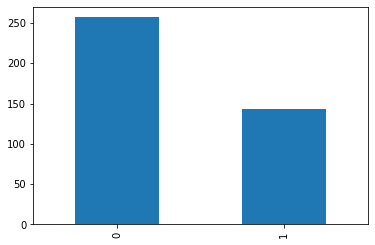

In [ ]:
data['Purchased'].value_counts().plot(kind='bar')
# it is clear that number customers purchased from social networking advertisment is far less that total customers viewed the advertisement.

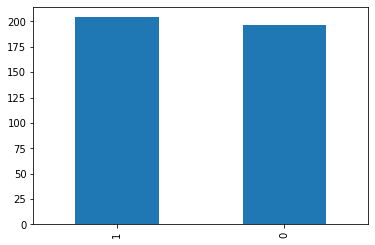

In [ ]:
data['Gender'].value_counts().plot(kind='bar')

In [ ]:
data['EstimatedSalary'].mean()

69742.5

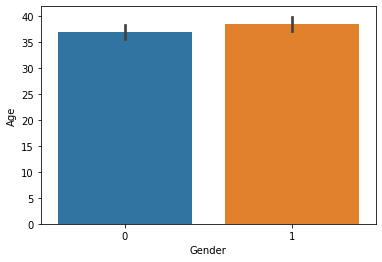

In [ ]:
sns.barplot(x='Gender',y='Age',data=data)
#Ages of females and males in this dataset are nearly close to each other

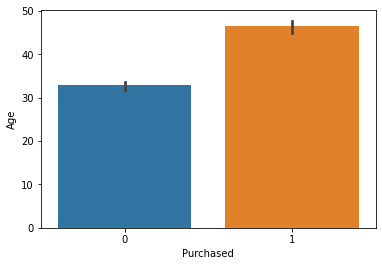

In [ ]:
sns.barplot(x='Purchased',y='Age',data=data)
#Older people purchased more than younger people

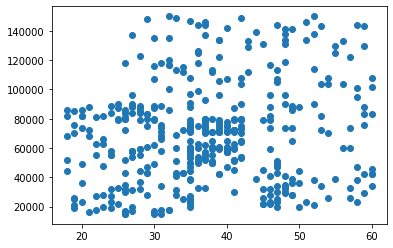

In [ ]:
# relation between estimated salary and Age in this dataset
plt.scatter(data.Age, data.EstimatedSalary)
#There is no corelation between Age and salary

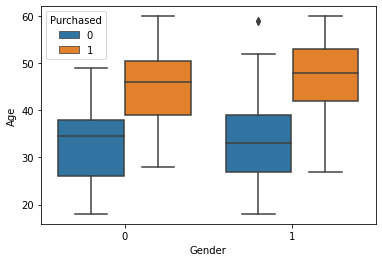

In [ ]:
sns.boxplot(y='Age', x='Gender',data=data,hue='Purchased')
#Older people both Males and Females are more probable to purchase than younger people

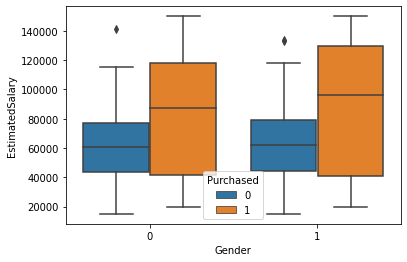

In [ ]:
sns.boxplot(y='EstimatedSalary', x='Gender',data=data,hue='Purchased')
#EstimatedSalary Mean and median of females are greater than men and people with high salary most probable to purchase

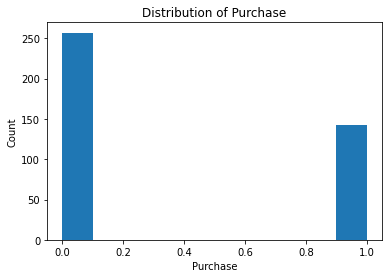

In [ ]:
plt.hist(x="Purchased", data=data);
plt.title('Distribution of Purchase');
plt.ylabel('Count');
plt.xlabel('Purchase');
#By this histogram we have clear idea that by the social media ads most of the users no/viewers not purchased the product.

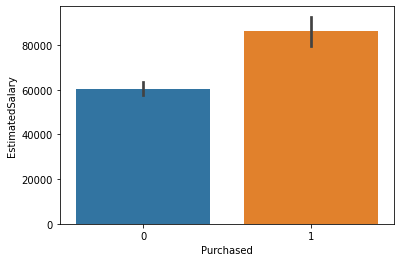

In [ ]:
sns.barplot(x="Purchased", y="EstimatedSalary", data=data)
#Person who have more salary purchased more.

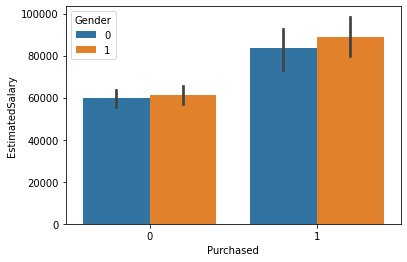

In [ ]:
sns.barplot(x="Purchased", y="EstimatedSalary",hue='Gender', data=data)
#FEMALES HAVE MORE SALARY.FEMALES PURCHASED MORE.

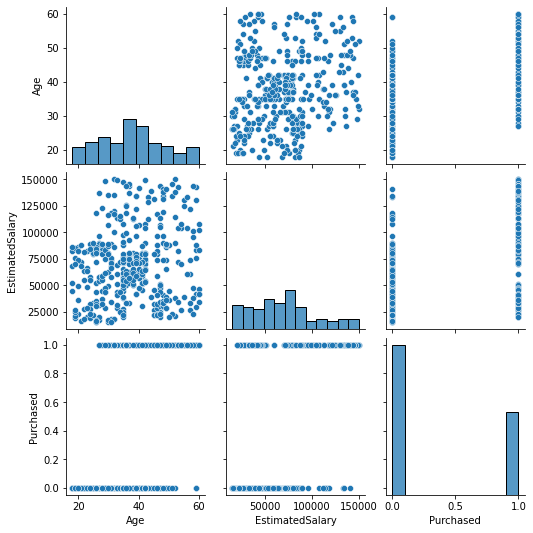

In [ ]:
sns.pairplot(data, vars=["Age", "EstimatedSalary","Purchased"])

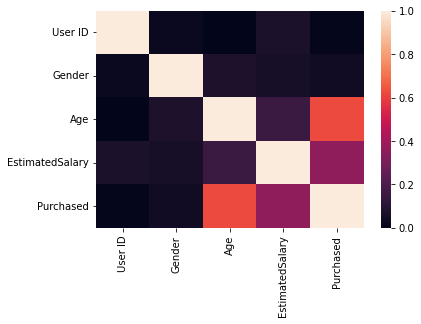

In [ ]:
sns.heatmap(data.corr())
#DARK COLOR:NO CORRELATION
#LIGHT COLOR:VERY HIGH CORRELATION


In [80]:
data = data.drop("User ID", axis=1)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [81]:
y=data.Purchased
x=data.drop('Purchased',axis=1)

In [82]:
x

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,0,51,23000
397,1,50,20000
398,0,36,33000


In [83]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [84]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [85]:
#FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train =sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [ ]:
#LOGISTICREGRESSION

In [86]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [87]:
y_pred= classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1])

In [88]:
print(accuracy_score(y_test, y_pred))
lr=accuracy_score(y_test, y_pred)

0.9


In [89]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[65  3]
 [ 7 25]]


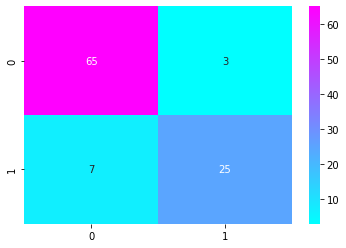

In [90]:
sns.heatmap(cm, annot=True, fmt='d', cmap='cool')
plt.show()
#out of 100,only 10 is wrongly predicted

In [ ]:
#KNN

In [91]:
from sklearn.neighbors import KNeighborsClassifier
classifierKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierKNN.fit(x_train, y_train)

KNeighborsClassifier()

In [92]:
y_pred1 = classifierKNN.predict(x_test)
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

In [93]:
print(accuracy_score(y_test, y_pred1))
knn=accuracy_score(y_test, y_pred1)

0.93


In [94]:
cm1 = confusion_matrix(y_test,y_pred1)
print(cm1)

[[64  4]
 [ 3 29]]


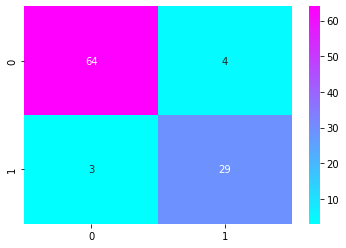

In [95]:
sns.heatmap(cm1, annot=True, fmt='d', cmap='cool')
plt.show()
#out of 100,only 7 is wrongly predicted

In [ ]:
#SVM

In [96]:
from sklearn.svm import SVC
svc_classifier = SVC(kernel = 'rbf', random_state = 0)
svc_classifier.fit(x_train, y_train)
svc_pred = svc_classifier.predict(x_test)

In [97]:
print(accuracy_score(y_test, svc_pred))
svm=accuracy_score(y_test,svc_pred)

0.93


In [98]:
cm3 = confusion_matrix(y_test,svc_pred)
print(cm3)

[[64  4]
 [ 3 29]]


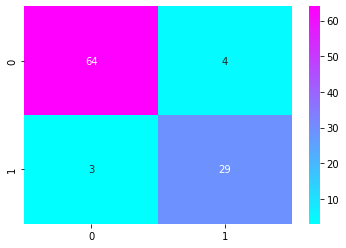

In [99]:
sns.heatmap(cm3, annot=True, fmt='d', cmap='cool')
plt.show()
#out of 100,only 8 is wrongly predicted

In [ ]:
#DECISION TREE CLASSIFIER

In [100]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(x_train, y_train)
dt_pred = dt_classifier.predict(x_test)

In [101]:
print(accuracy_score(y_test, dt_pred))
dt=accuracy_score(y_test,dt_pred)

0.92


In [102]:
cm4 = confusion_matrix(y_test,dt_pred)
print(cm4)

[[63  5]
 [ 3 29]]


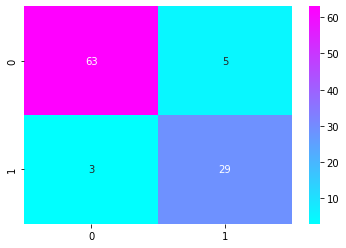

In [103]:
sns.heatmap(cm4, annot=True, fmt='d', cmap='cool')
plt.show()
#out of 100,only 8 is wrongly predicted

In [ ]:
#RANDOMFOREST

In [104]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf_classifier.fit(x_train, y_train)
rf_pred = rf_classifier.predict(x_test)

In [ ]:
print(accuracy_score(y_test, rf_pred))
rf=accuracy_score(y_test, rf_pred) 

0.93


In [105]:
cm5 = confusion_matrix(y_test,rf_pred)
print(cm5)

[[64  4]
 [ 5 27]]


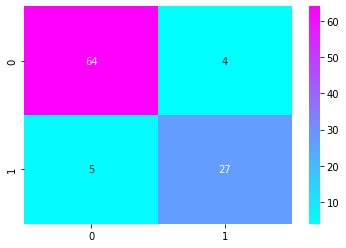

In [106]:
sns.heatmap(cm5, annot=True, fmt='d', cmap='cool')
plt.show()
#out of 100,only 7 is wrongly predicted

In [107]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
classifier.fit(x_train, y_train)

# Predicting the Test set results
nb_pred = classifier.predict(x_test)

In [108]:
print(accuracy_score(y_test, nb_pred))
nb=accuracy_score(y_test,nb_pred)

0.9


In [109]:
cm6 = confusion_matrix(y_test,nb_pred)
print(cm6)

[[65  3]
 [ 7 25]]


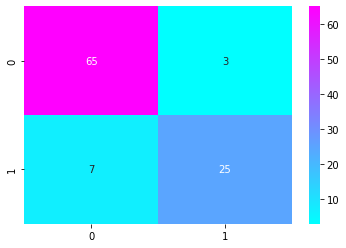

In [110]:
sns.heatmap(cm6, annot=True, fmt='d', cmap='cool')
plt.show()
#out of 100,only 10 is wrongly predicted

<BarContainer object of 6 artists>

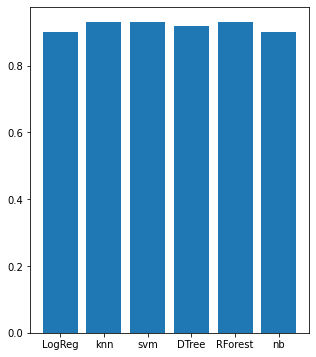

In [111]:
#comparing accuracies
plt.figure(figsize= (5,6))
ac = [lr,knn,svm,dt,rf,nb]
name = ['LogReg','knn','svm','DTree', 'RForest','nb']
plt.bar(name,ac)

In [ ]:
#KNN and RANDOM FOREST ARE THE BEST MODELS

In [113]:
#predict by your own data
sales_pred = rf_classifier.predict([[0,50,20000]])
print(sales_pred)

[1]


In [114]:
#1 means this particular person with this data ,WILL BUY THE PRODUCT.